## Football Dataset Real-Life Application

With years of specific game data for dozens of teams, and hundreds of players with advanced techniques we should be able to predict the outcome: both from a game-winning standpoint and a logistic turnout standpoint.

### Things 2 main goals of our project are:
* Anticipate Seating Demand with Time-Series Extrapolation and Specific Team Matchups
* Predict the Outcome of the any particular hypothetical team matchup

Due to the Incredibly complex nature of the problem we are attempting to solve: one that involves hundreds of variables we have access to and countless that we don't. We are going to need an exceptionally powefull tool in the form of Machine Learning, and clever framing to extact useful features from this daunting problem.





#### The problem of predicting team performance has to do with 2 elements:
- How much "synergy" do players in a team have?
- How do these two teams specific matchup?


Since we are going to be using tensorflow to solve this problem, we can utilize a unique function called model concatenation. Where separate deep learning models can be "concatenated" together with a connected gradient tape. This allows for learning to happen in stages and certain features to be convoled and propogated with a selective set of other features.

To reflect the two stage nature of our problem, we devised the following predictive tensorflow model.

![](model_struct.JPG)


In [1]:
import tensorflow as tf


num_players, num_features = 30, 10

# Define concatenated model using tf.keras functional API

# model input branch for team-1 (analogous to computing synergy)
team1_input = tf.keras.layers.Input(shape=[num_players, num_features])
team1_conv1 = tf.keras.layers.Conv1D(3, 5)(team1_input)
team1_pooling = tf.keras.layers.AveragePooling1D(pool_size=2)(team1_conv1)
team1_flatten = tf.keras.layers.Flatten()(team1_pooling)
team1_layer1 = tf.keras.layers.Dense(32, activation='relu')(team1_flatten)
team1_layer2 = tf.keras.layers.Dense(num_features, activation='relu')(team1_layer1)

# model input branch for team-2 (analogous to computing synergy)
team2_input = tf.keras.layers.Input(shape=[num_players, num_features])
team2_conv1 = tf.keras.layers.Conv1D(3, 5)(team1_input)
team2_pooling = tf.keras.layers.AveragePooling1D(pool_size=2)(team1_conv1)
team2_flatten = tf.keras.layers.Flatten()(team1_pooling)
team2_layer1 = tf.keras.layers.Dense(32, activation='relu')(team1_flatten)
team2_layer2 = tf.keras.layers.Dense(num_features, activation='relu')(team2_layer1)

# concatenate branches and propogate for final matchup
concat_layer = tf.keras.layers.Concatenate()([team1_layer2, team2_layer2])
concat_dense1 = tf.keras.layers.Dense(32, activation='relu')(concat_layer)
concat_dense1 = tf.keras.layers.Dense(128, activation='relu')(concat_layer)
concat_dropout = tf.keras.layers.Dropout(.5)(concat_dense1)
output = tf.keras.layers.Dense(1, activation='sigmoid')(concat_dropout)



In [2]:
# define and compile model
model = tf.keras.Model(inputs=[team1_input, team2_input], outputs=[output])
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mse', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30, 10)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 26, 3)        153         input_1[0][0]                    
__________________________________________________________________________________________________
average_pooling1d (AveragePooli (None, 13, 3)        0           conv1d[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 39)           0           average_pooling1d[0][0]          
______________________________________________________________________________________________

In [3]:
import random
import numpy as np

# generate random testing data
def gen_test(n):
    return np.array([[[random.randint(0,10) for _ in range(num_features)] for _ in range(num_players)] for _ in range(n)])

test1_x = gen_test(100)
test2_x = gen_test(100)
test_y = np.array([random.randint(0,1) for _ in range(100)])

# fit model to random data
history = model.fit([test1_x, test2_x], test_y, epochs=100)


Train on 100 samples
Epoch 1/100
100/100 [==============================] - 1s 7ms/sample - loss: 0.3056 - accuracy: 0.6000
Epoch 2/100
100/100 [==============================] - 0s 140us/sample - loss: 0.3269 - accuracy: 0.4900
Epoch 3/100
100/100 [==============================] - 0s 170us/sample - loss: 0.3142 - accuracy: 0.4400
Epoch 4/100
100/100 [==============================] - 0s 150us/sample - loss: 0.2492 - accuracy: 0.6200
Epoch 5/100
100/100 [==============================] - 0s 120us/sample - loss: 0.2613 - accuracy: 0.6000
Epoch 6/100
100/100 [==============================] - 0s 140us/sample - loss: 0.2593 - accuracy: 0.5600
Epoch 7/100
100/100 [==============================] - 0s 140us/sample - loss: 0.2583 - accuracy: 0.5900
Epoch 8/100
100/100 [==============================] - 0s 130us/sample - loss: 0.2494 - accuracy: 0.6600
Epoch 9/100
100/100 [==============================] - 0s 140us/sample - loss: 0.2333 - accuracy: 0.6500
Epoch 10/100
100/100 [==============

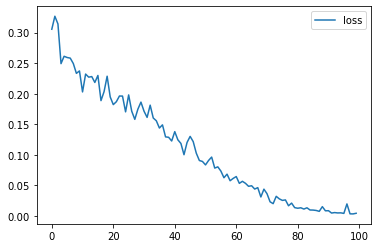

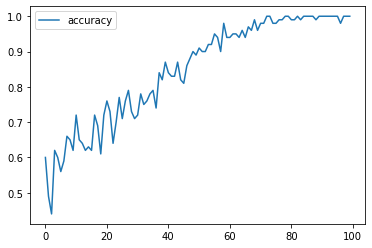

In [4]:
import matplotlib.pyplot as plt

loss = history.history['loss']
#val_loss = history.history['val_loss']
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

epochs = list(range(len(loss)))

plt.figure(1)
plt.plot(epochs, loss, label='loss')
#plt.plot(epochs, val_loss, label='validation loss')
plt.legend()
plt.figure(2)
plt.plot(epochs, acc, label='accuracy')
#plt.plot(epochs, val_acc, label='validation accuracy')
plt.legend()
plt.show()